In [22]:
import pandas as pd
import os

In [23]:
import re

def extract_years(s):
    substrings = re.findall(r'\d{4}', s)
    ys = [int(y) for y in substrings]
    max_year = max(ys) if ys else 0
    return max_year

In [24]:
df = pd.read_csv('all_images.csv')
df.head()

,id,title,collection,filetype,date
0,11650,"(China), view of town with market at left",agsphoto,jp2,1932
1,14254,"(Philippines), stream and mountains near Nueva...",agsphoto,jp2,1935
2,9751,"(Thailand), railway connecting Changwats Chump...",agsphoto,jp2,1936-10-26
3,11504,"[Uncertain], Long long trail",ags_south,jp2,1950
4,11529,"[Uncertain], Man and his horse by eternal snow",ags_south,jp2,1950


In [25]:
df.date = df.date.apply(lambda x: extract_years(str(x)))

In [26]:
df.head()

,id,title,collection,filetype,date
0,11650,"(China), view of town with market at left",agsphoto,jp2,1932
1,14254,"(Philippines), stream and mountains near Nueva...",agsphoto,jp2,1935
2,9751,"(Thailand), railway connecting Changwats Chump...",agsphoto,jp2,1936
3,11504,"[Uncertain], Long long trail",ags_south,jp2,1950
4,11529,"[Uncertain], Man and his horse by eternal snow",ags_south,jp2,1950


In [27]:
df.date.min(), df.date.max()

(0, 1999)

In [28]:
paths = dict(
    id=[],
    collection=[],
    path=[],
    exists=[],
)

for _, row in df.iterrows():
    paths['id'].append(row.id)
    paths['collection'].append(row.collection)
    path = f'{row.collection}_{row.id}.{row.filetype}'
    paths['path'].append(path)
    paths['exists'].append(os.path.exists(f'images/{path}'))

df_paths = pd.DataFrame(paths)
df_paths.head()

,id,collection,path,exists
0,11650,agsphoto,agsphoto_11650.jp2,True
1,14254,agsphoto,agsphoto_14254.jp2,True
2,9751,agsphoto,agsphoto_9751.jp2,True
3,11504,ags_south,ags_south_11504.jp2,True
4,11529,ags_south,ags_south_11529.jp2,True


In [29]:
df_paths.exists.value_counts()

exists
False    107007
True       4993
Name: count, dtype: int64

In [30]:
df = pd.merge(df, df_paths, on=['id', 'collection'])
df.head()

,id,title,collection,filetype,date,path,exists
0,11650,"(China), view of town with market at left",agsphoto,jp2,1932,agsphoto_11650.jp2,True
1,14254,"(Philippines), stream and mountains near Nueva...",agsphoto,jp2,1935,agsphoto_14254.jp2,True
2,9751,"(Thailand), railway connecting Changwats Chump...",agsphoto,jp2,1936,agsphoto_9751.jp2,True
3,11504,"[Uncertain], Long long trail",ags_south,jp2,1950,ags_south_11504.jp2,True
4,11529,"[Uncertain], Man and his horse by eternal snow",ags_south,jp2,1950,ags_south_11529.jp2,True


In [31]:
df_date_value_counts = df[df['exists']].date.value_counts().sort_index(ascending=True)
df_date_value_counts

date
0       462
1897      1
1904      5
1906      1
1907      9
       ... 
1973    325
1974      1
1975     68
1987     21
1988     20
Name: count, Length: 63, dtype: int64

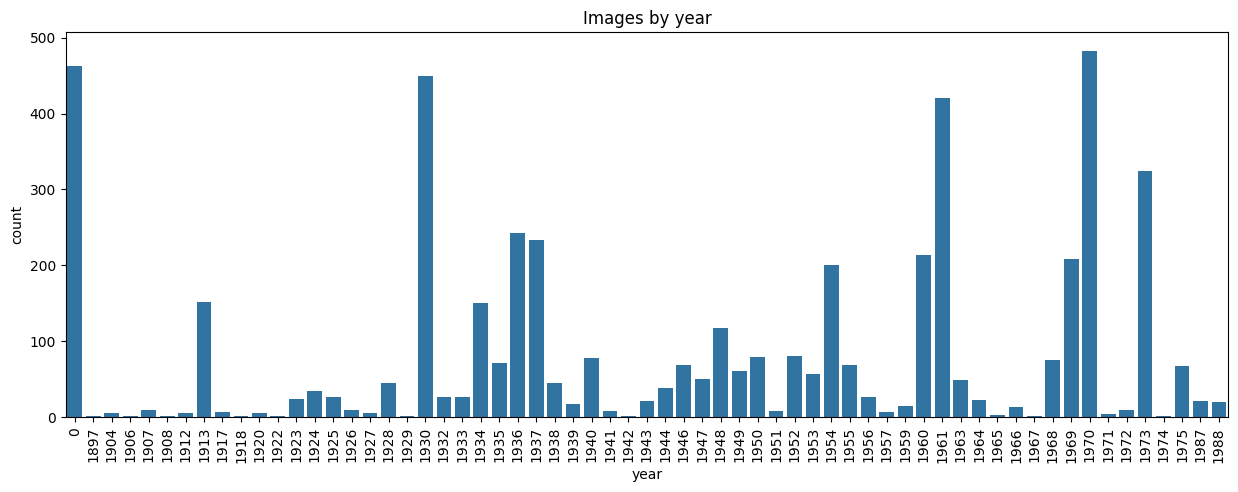

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

value_counts_df = df_date_value_counts.reset_index()
value_counts_df.columns = ['year', 'count']

plt.figure(figsize=(15, 5))
sns.barplot(x='year', y='count', data=value_counts_df, order=value_counts_df['year'])
plt.title('Images by year')
plt.xlabel('year')
plt.ylabel('count')
plt.xticks(rotation=90)

plt.show()


In [33]:
df.to_csv('all_images_improved.csv', index=False)